<a href="https://colab.research.google.com/github/Dylan-Sin/4AI3---Project/blob/main/4AI3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# create dataframes for the training and test datasets
df_train = pd.read_csv('/content/aps_failure_training_set.csv', na_values='na')
df_test = pd.read_csv('/content/aps_failure_test_set.csv', na_values='na')

In [ ]:
# start visualizing the data
print(df_train.shape)
print(df_test.shape)

(60000, 171)
(16000, 171)


In [ ]:
# see what the data looks like
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
# combine the two datasets so that it is easier to perform data pre-processing

df = pd.concat([df_train,df_test], axis = 0)
print(df.shape)
df.head()

(76000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
# dataset has lots of NaN values, we want to see what percentage of NaN values make up each column

NaNs = df.isna().sum().div(df_train.shape[0]).mul(100).to_frame().round().sort_values(by = 0)
NaNs


,0
class,0.0
bt_000,0.0
aa_000,0.0
ba_004,1.0
cn_004,1.0
...,...
bo_000,98.0
ab_000,98.0
bp_000,101.0
bq_000,103.0


<BarContainer object of 171 artists>

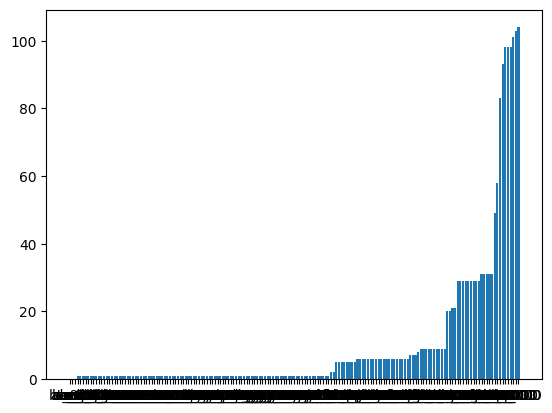

In [ ]:
# visualize the amount of NaNs per attribute/column as a percentage

plt.bar(NaNs.index, NaNs.values.T[0])

In [ ]:
# We do not need columns that are missing more than 20% of their data

NaNs_to_drop = NaNs[NaNs[0]>20]
NaNs_to_drop

,0
cm_000,21.0
ec_00,21.0
db_000,29.0
da_000,29.0
cx_000,29.0
cy_000,29.0
dc_000,29.0
cz_000,29.0
ct_000,29.0
cu_000,29.0


<BarContainer object of 145 artists>

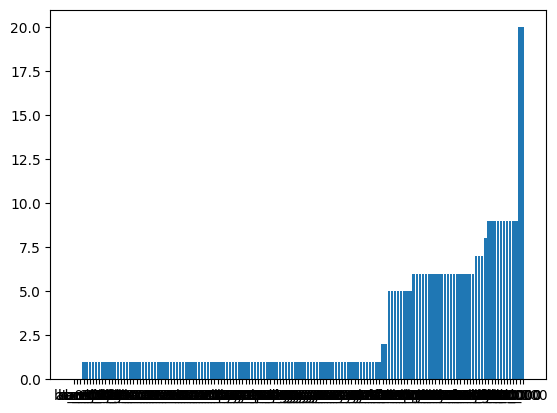

In [ ]:
# graph of the values we will be using

NaNs_to_keep = NaNs[NaNs[0]<=20]
plt.bar(NaNs_to_keep.index, NaNs_to_keep.values.T[0])

In [ ]:
# create a list indexing all the columns that we wish to drop

drop_list = list(NaNs_to_drop.index)
drop_list.append('class')
print(drop_list)



['cm_000', 'ec_00', 'db_000', 'da_000', 'cx_000', 'cy_000', 'dc_000', 'cz_000', 'ct_000', 'cu_000', 'cv_000', 'ad_000', 'cf_000', 'cg_000', 'ch_000', 'co_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'cr_000', 'bo_000', 'ab_000', 'bp_000', 'bq_000', 'br_000', 'class']


In [ ]:
# drop the columns

X = df.drop(drop_list, axis = 1)
y_list = df['class']

In [ ]:
# review the dataset after the columns have been dropped

X.head(40)

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,38312,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,9128.0,701702.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,14,6.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1202.0,3766.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,102960,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,2130.0,142462.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,78696,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,458.0,440704.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,153204,1.820000e+02,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# replace the neg with 0 and the pos with 1 in the y dataset

y = pd.get_dummies(y_list).drop('neg',axis = 1)
print(y.shape)
y

(76000, 1)


,pos
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


In [ ]:
# backfill all the NaN values that still exist

X.fillna(method='bfill', axis=0, inplace=True)
print(X.shape)
X

(76000, 144)


,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,704012.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18,5.200000e+01,8.0,26.0,0.0,0.0,0.0,0.0,6444.0,3308.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636,1.670000e+03,0.0,0.0,0.0,0.0,0.0,0.0,15062.0,1991298.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110,3.600000e+01,0.0,0.0,0.0,0.0,0.0,0.0,198.0,3730.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [ ]:
# split the data back into a training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# apply a RandomOverSampling technic to account for the disparity of class distribution

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# standardize the data

scaler = StandardScaler().fit(X_train_resampled)
X_train_resampled = scaler.transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# visualizing new data
X_train_resampled

array([[-0.32932423, -0.38513502, -0.0600203 , ..., -0.13988309,
        -0.03824789, -0.03927061],
       [-0.35683579, -0.38513668, -0.0600203 , ..., -0.16285289,
        -0.03824789, -0.03927061],
       [-0.31105175, -0.3851357 , -0.0600203 , ..., -0.0991255 ,
        -0.03824789, -0.03927061],
       ...,
       [ 0.09400152, -0.38512965, -0.0600203 , ..., -0.16285289,
        -0.03824789, -0.03927061],
       [-0.09579875, -0.38512805, -0.0600203 , ..., -0.16246987,
        -0.03824789, -0.03927061],
       [ 1.31507122, -0.385135  , -0.0600203 , ...,  0.10121532,
        -0.03824789, -0.03927061]])

In [ ]:
# visualign new data
y_train_resampled

,pos
0,0
1,0
2,0
3,0
4,0
...,...
119443,1
119444,1
119445,1
119446,1


In [ ]:
# create a sequential neural network model similar to how it was done in the labs, but with binary classification in mind

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1],kernel_regularizer=regularizers.l1(0.001)),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dense(1, activation='sigmoid')
])

In [ ]:
# configure the model with the adam optimizer, using binary loss function, and measuring for accuracy

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit and train the model using the resampled data and go through 20 epochs

history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2987/2987 [==============================] - 13s 4ms/step - loss: 0.4873 - accuracy: 0.9483 - val_loss: 0.4082 - val_accuracy: 0.9301
Epoch 2/20
2987/2987 [==============================] - 9s 3ms/step - loss: 0.2823 - accuracy: 0.9606 - val_loss: 0.2935 - val_accuracy: 0.9328
Epoch 3/20
2987/2987 [==============================] - 8s 3ms/step - loss: 0.2096 - accuracy: 0.9641 - val_loss: 0.2270 - val_accuracy: 0.9552
Epoch 4/20
2987/2987 [==============================] - 9s 3ms/step - loss: 0.1720 - accuracy: 0.9662 - val_loss: 0.1769 - val_accuracy: 0.9635
Epoch 5/20
2987/2987 [==============================] - 8s 3ms/step - loss: 0.1569 - accuracy: 0.9671 - val_loss: 0.1759 - val_accuracy: 0.9622
Epoch 6/20
2987/2987 [==============================] - 9s 3ms/step - loss: 0.1492 - accuracy: 0.9677 - val_loss: 0.1647 - val_accuracy: 0.9640
Epoch 7/20
2987/2987 [==============================] - 9s 3ms/step - loss: 0.1425 - accuracy: 0.9683 - val_loss: 0.1587 - val_accuracy

In [ ]:
# use the model to predict the likelihood of a negative or positive in the test data

model.predict(X_test)

475/475 [==============================] - 1s 2ms/step


array([[0.01636834],
       [0.02328581],
       [0.02478587],
       ...,
       [0.02495751],
       [0.01895972],
       [0.01156155]], dtype=float32)

In [ ]:
# display the accuracy of the model

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy*100)

475/475 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.9729
97.28947281837463
